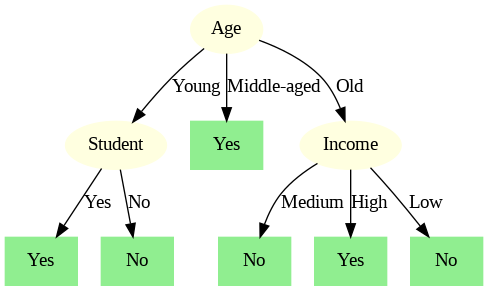

In [1]:
import math
import pandas as pd
from graphviz import Digraph
from IPython.display import Image

def calculate_entropy(dataset):
    class_counts = dataset['Buy Computer'].value_counts()
    entropy = 0
    total_instances = len(dataset)
    for count in class_counts:
        probability = count / total_instances
        entropy -= probability * math.log2(probability)
    return entropy # Corrected: 'entropyy' to 'entropy'


def calculate_information_gain(dataset, attribute):
    """Calculates the information gain of an attribute."""
    total_entropy = calculate_entropy(dataset)
    attribute_values = dataset[attribute].unique()
    weighted_entropy = 0

    for value in attribute_values:
        subset = dataset[dataset[attribute] == value]
        subset_entropy = calculate_entropy(subset)
        weighted_entropy += (len(subset) / len(dataset)) * subset_entropy

    information_gain = total_entropy - weighted_entropy
    return information_gain


def build_decision_tree(dataset, attributes, parent_node=None, graph=None):
    if graph is None:
        graph = Digraph('DecisionTree')

    # Base case: If all examples are in the same class or no attributes left
    if len(dataset['Buy Computer'].unique()) == 1 or not attributes:
        class_label = dataset['Buy Computer'].iloc[0]
        graph.node(parent_node, label=class_label, shape='box', style='filled', color='lightgreen')
        return graph

    best_attribute = max(attributes, key=lambda attr: calculate_information_gain(dataset, attr))
    graph.node(parent_node, label=best_attribute, shape='ellipse', style='filled', color='lightyellow')

    attribute_values = dataset[best_attribute].unique()
    for value in attribute_values:
        subset = dataset[dataset[best_attribute] == value].drop(columns=[best_attribute])
        child_node = f'{parent_node}_{value}' if parent_node else value
        graph.edge(parent_node, child_node, label=value)
        build_decision_tree(subset, [attr for attr in attributes if attr != best_attribute], child_node, graph)

    return graph


data = {
    'Age': ['Young', 'Young', 'Middle-aged', 'Old', 'Old', 'Old'],
    'Income': ['High', 'High', 'Low', 'Medium', 'High', 'Low'],
    'Student': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No'],
    'Buy Computer': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}

dataset = pd.DataFrame(data)
attributes = ['Age', 'Income', 'Student']

graph = build_decision_tree(dataset, attributes, 'Root')
graph.render('decision_tree', format='png')
Image(filename='decision_tree.png')